In [30]:
import numpy
import matplotlib.pyplot as plt
import scipy
import sympy

12.1 Alla on kuvia jatkuvan satunnaismuuttujan 𝑋 tiheysfunktiosta ja niissä olevista sinistä pinta-alaa vastaavista todennäköisyyksistä. Yhdistä kuvat oikeisiin todennäköisyyksiin I-VI.
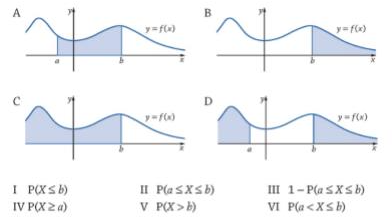

A = II
B = V
C = I
D = III

12.2. Alla on kuva jatkuvan satunnaismuuttujan 𝑋 kertymäfunktiosta 𝐹(𝑎). Laske kuvan perusteella todennäköisyydet 𝑃(𝑋<2), 𝑃(𝑋>5) ja 𝑃(1<𝑋<2).
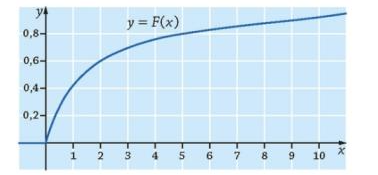

P(X<2) = 60%
p(X>5) = 20%
P(1<X<2) = 1 - 0.4 - 0.4 = 20%

12.3 Olkoon jatkuvan satunnaismuuttujan 𝑋 tiheysfunktion lauseke paloittain määriteltynä: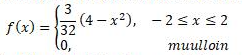 Näytä ensin, että 𝑓(𝑥) on tiheysfunktio, eli funktio ei saa negatiivisia arvoja ja määrätty integraali koko välin yli on 1. Laske tämän jälkeen todennäköisyydet 𝑃(𝑋<0), 𝑃(𝑋>1) ja 𝑃(−1<𝑋<1).

In [31]:
## Answer here
def prob_continuous(x):
    if -2 <= x <= 2:
        return ((3*(4-x**2)/32))
    else:
        return 0
      
# lets calculate the area under the curve
# using the scipy.integrate.quad function
area = scipy.integrate.quad(prob_continuous, -numpy.inf, numpy.inf)[0]
print(area)

# Lets calculate P(x < 0)
area_smaller_than_0 = scipy.integrate.quad(prob_continuous, -numpy.inf, 0)[0]
print("P(x < 0) = ", area_smaller_than_0)

# Lets calculate P(x > 1)
area_greater_than_1 = scipy.integrate.quad(prob_continuous, 1, numpy.inf)[0]
print("P(x > 1) = ", area_greater_than_1)

# Lets calculate P(-1 < x < 1)
area_between_minus1_and_1 = scipy.integrate.quad(prob_continuous, -1, 1)[0]
print("P(-1 < x < 1) = ", area_between_minus1_and_1)


1.000000000000068
P(x < 0) =  0.500000000000034
P(x > 1) =  0.15625
P(-1 < x < 1) =  0.6875


I have no clue where the 68 comes from in the exact area. i believe it´s the sampling size of scipy integrate quad

12.4 Laske tehtävän 12.3 satunnaismuuttujan odotusarvo ja keskihajonta. Piirrä tiheysfunktion kuvaaja.

excepted value of x =  0.0
std_dev =  0.8944271909999159


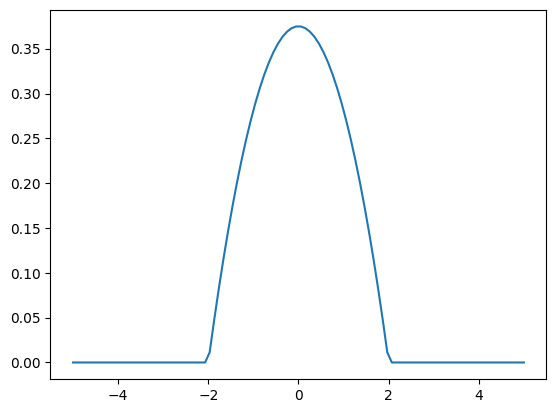

In [32]:
## Code here
def integral_of_continuous(x):
    if -2 <= x <= 2:
        return ((3/32)*(4*x-x**3)/3)
    else:
        return 0
    
print("excepted value of x = ", integral_of_continuous(2)-integral_of_continuous(-2))

# lets calculate the standard deviation
std_dev = numpy.sqrt(scipy.integrate.quad(lambda x: prob_continuous(x)*x**2, -2, 2))[0]
print("std_dev = ", std_dev)

# lets plot the function
x = numpy.linspace(-5,5,100)
y = [prob_continuous(i) for i in x]
plt.plot(x,y)
plt.show()

12.5 Muodosta integroimalla kertymäfunktio 𝐹(𝑎) tehtävän 12.3 satunnaismuuttujalle 𝑋 ja piirrä sen kuvaaja. Laske tämän kertymäfunktion avulla samat todennäköisyydet kuin tehtävässä 12.3.

integrated func:  -x**3/32 + 3*x/8


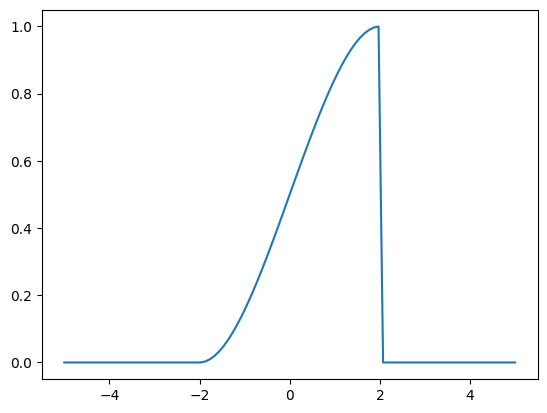

P(x < 0) =  0.5
P(x > 1) =  0.15625
P(-1 < x < 1) =  0.6875


In [33]:
## Code here
x = sympy.Symbol('x')
f = 3 * (4 - x**2) / 32  # Removed unnecessary parentheses
sympy.init_printing()
integrated_f = sympy.integrate(f, x)
print("integrated func: ", integrated_f)

def prob_continuous_2(x):
    if -2 <= x <= 2:
        # placing the constant was important
        return -x**3/32 + 3*x/8 + 0.5
    else:
        return 0
    
# plot
x = numpy.linspace(-5,5,100)
y = [prob_continuous_2(i) for i in x]
plt.plot(x,y)
plt.show()

# calculatng the cumulative distribution
# P(x < 0)
first = prob_continuous_2(0)

# P(x > 1)
second = 1 - prob_continuous_2(1)

# P(-1 < x < 1)
third = prob_continuous_2(1) - prob_continuous_2(-1)

print("P(x < 0) = ", first)
print("P(x > 1) = ", second)
print("P(-1 < x < 1) = ", third)



12.6 Tikkaa heitetään satunnaisesti tikkatauluun, jonka säde on 20 𝑐𝑚. Olkoon satunnaismuuttuja 𝑋 tikan etäisyys keskipisteestä. Muodosta tämän geometrisen tilanteen perusteella satunnaismuuttujalle kertymäfunktio (huom., ympyrän pinta-ala on 𝐴=𝜋𝑟2). Muodosta satunnaismuuttujalle tiheysfunktio derivoimalla tämä saatu kertymäfunktio. Laske kertymäfunktion avulla todennäköisyys 𝑃(𝑋<10).

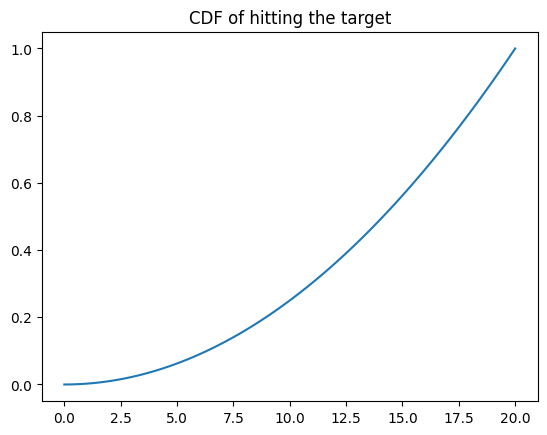

fprime:  l/200


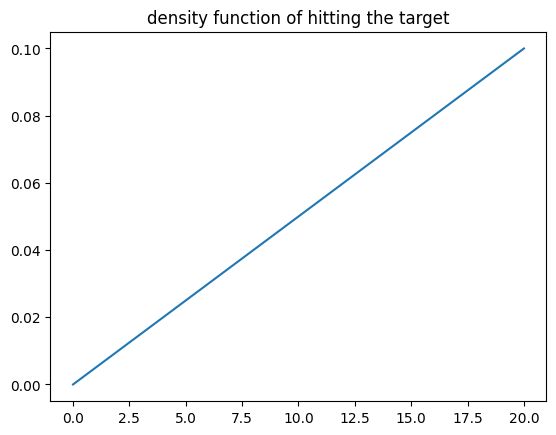

area =  1.0000000000000002
area in total is 1, so the function is correct
P(x < 10) =  0.25000000000000006


In [34]:
## Code here

def prob_of_hitting_target(x):
    if 0 <= x <= 20:
        return numpy.pi*x**2/(numpy.pi*20**2)
    else:
        return 0

x = numpy.linspace(0,20,100)
y = [prob_of_hitting_target(i) for i in x]
plt.plot(x,y)
plt.title("CDF of hitting the target")
plt.show()

l = sympy.Symbol('l')
f = sympy.pi*l**2/(sympy.pi*20**2)
fprime = f.diff(l)
print("fprime: ", fprime)

def derivated_func(x):
    if 0 <= x <= 20:
        return x/200
    else:
        return 0
    
x = numpy.linspace(0,20,100)
y = [derivated_func(i) for i in x]
plt.plot(x,y)
plt.title("density function of hitting the target")
plt.show()

# lets calculate the area under the curve
# using the scipy.integrate.quad function
area = scipy.integrate.quad(derivated_func, 0, 20)[0]
print("area = ", area)
print("area in total is 1, so the function is correct")

# lets calculate P(x < 10)
area_smaller_than_10 = scipy.integrate.quad(derivated_func, 0, 10)[0]
print("P(x < 10) = ", area_smaller_than_10)
